In [2]:
import tifffile

from matplotlib import pyplot as plt
%matplotlib inline

from skimage.metrics import peak_signal_noise_ratio

In [3]:
empty = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/036/ffcorr-corr-dead-px-all/scan_0003.tif')

In [4]:
full = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/041/ffcorr-corr-dead-px-all/scan_0459.tif')

In [5]:
full_after = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/041/ffcorr-corr-dead-px-all_denoised/scan_0459.tif')

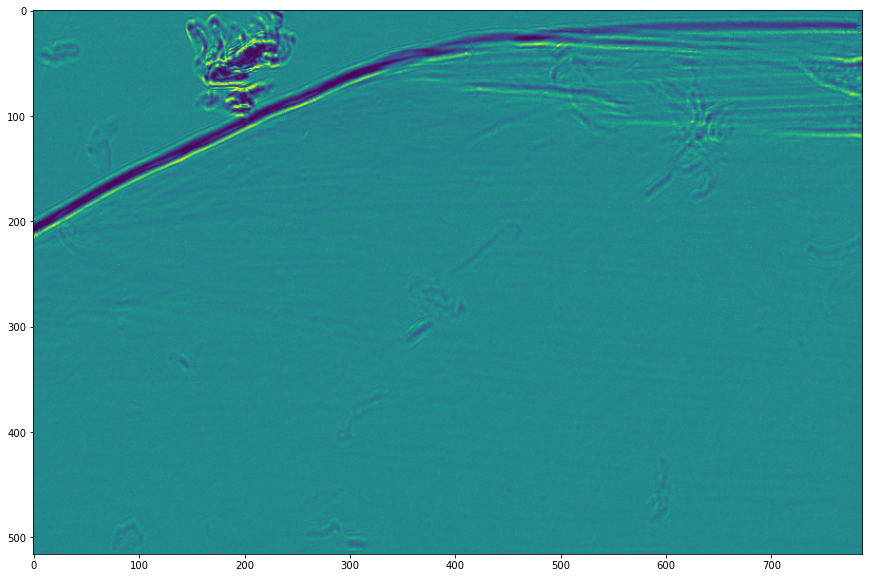

In [6]:
plt.figure(figsize=(16, 10))
plt.imshow(empty.mean(0))

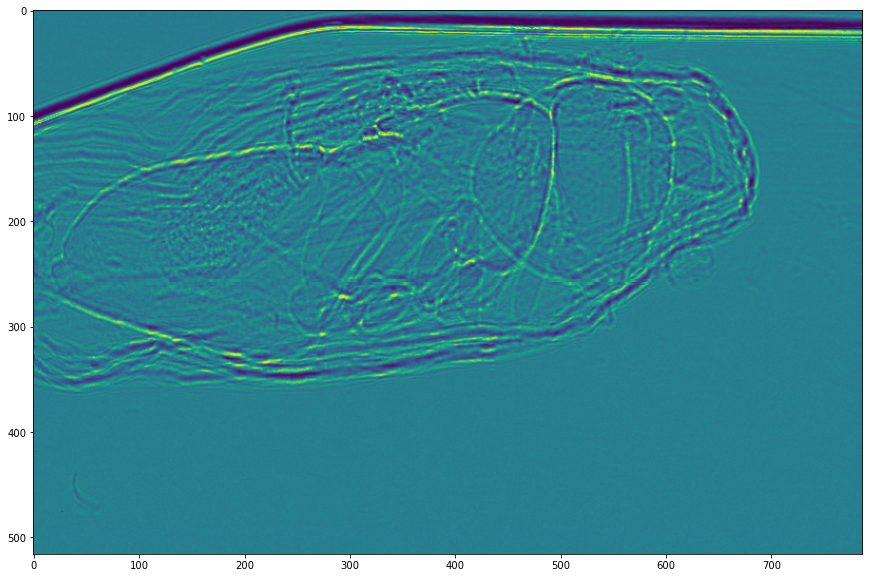

In [7]:
plt.figure(figsize=(16, 10))
plt.imshow(full.mean(0))

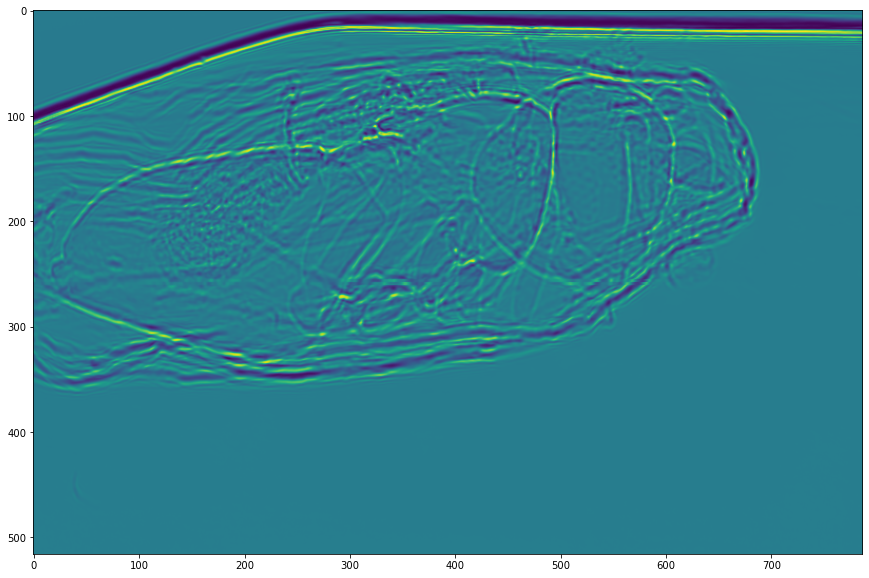

In [8]:
plt.figure(figsize=(16, 10))
plt.imshow(full_after.mean(0))

In [9]:
full.max()

2.3999999

In [10]:
full_mean = full.mean(0)
full_range = full.max()-full.min()

In [11]:
psnr_before = [peak_signal_noise_ratio(full[i], full_mean, data_range=full_range) for i in range(len(full))]

In [12]:
psnr_after = [peak_signal_noise_ratio(full_after[i], full_mean, data_range=full_range) for i in range(len(full_after))]

In [13]:
import numpy as np

In [14]:
np.mean(psnr_before), np.std(psnr_before)

(25.241292206596817, 0.02402286492258225)

In [80]:
import numpy as np, scipy.stats as st

def get_ci_estimation(sequence):
    ci = st.t.interval(0.95, len(sequence)-1, loc=np.mean(sequence), scale=st.sem(sequence))
    print(f'${np.mean(sequence)} \pm {(ci[1] - ci[0])/2}$')

In [81]:
get_ci_estimation(psnr_before)

$25.241292206596817 \pm 0.004790671120613155$


In [82]:
get_ci_estimation(psnr_after)

$33.1114700754446 \pm 0.013890039584083524$


(array([ 2.,  1.,  2.,  2., 10., 25., 21., 17., 16.,  2.]),
 array([32.86990176, 32.90834383, 32.9467859 , 32.98522796, 33.02367003,
        33.06211209, 33.10055416, 33.13899623, 33.17743829, 33.21588036,
        33.25432242]),
 <BarContainer object of 10 artists>)

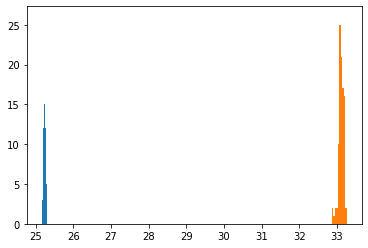

In [15]:
plt.hist(psnr_before)
plt.hist(psnr_after)

In [56]:
a = tifffile.imread('/mnt/HD-LSDF/sd18a004/for_yaroslav/spec_ct_processed/processed_03/iteration_06keV/recon/slice_0099.tif')

In [57]:
b = tifffile.imread('/mnt/HD-LSDF/sd18a004/for_yaroslav/spec_ct_processed/processed_04/iteration_06keV/recon/slice_0099.tif')

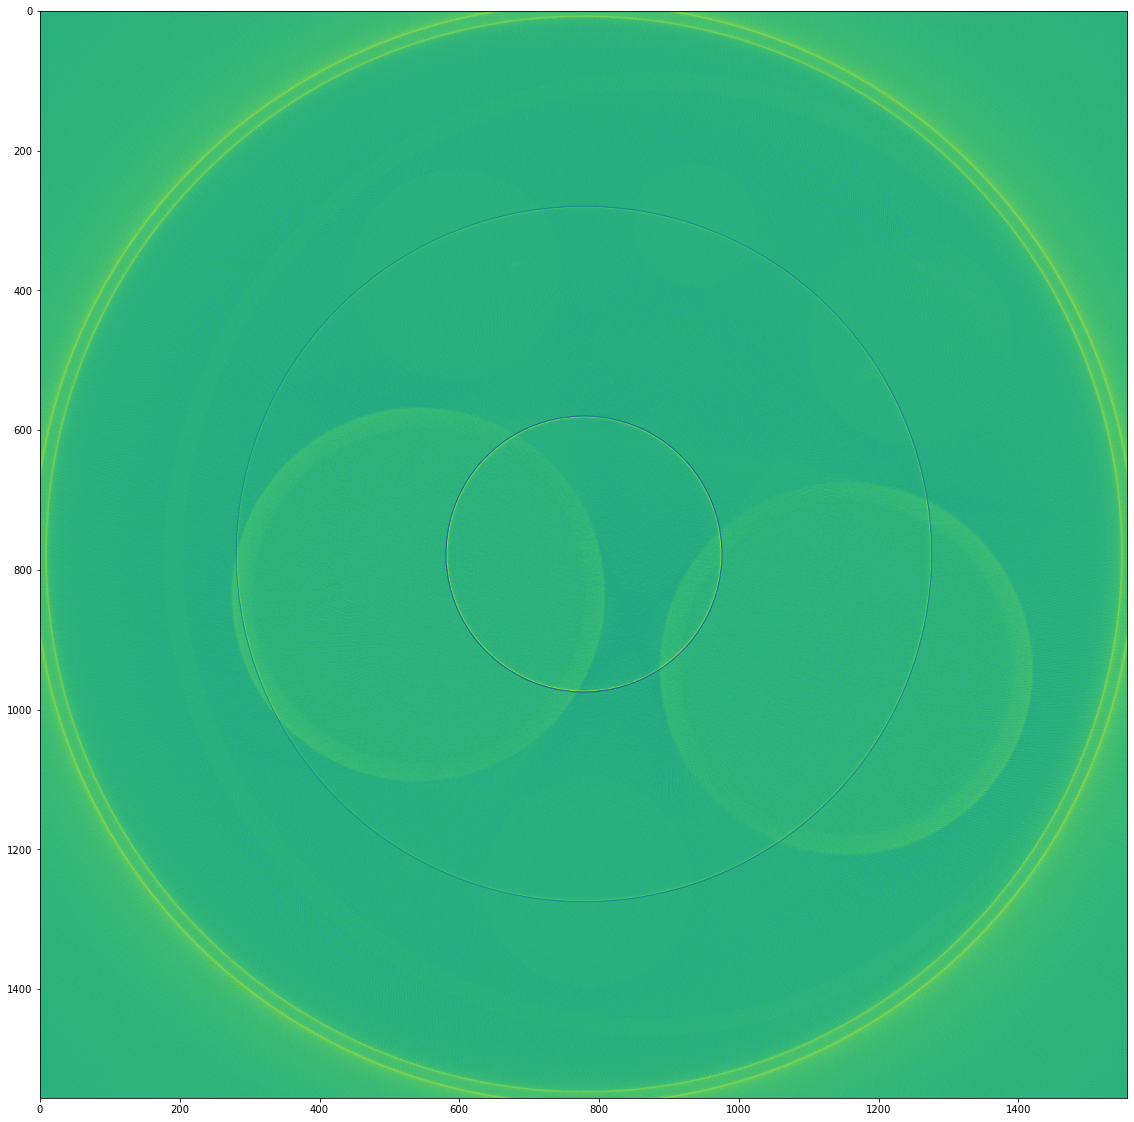

In [61]:
plt.figure(figsize=(20, 20))
plt.imshow(b)

In [66]:
2344 * 12

28128

In [62]:
b.max(), b.min(), b.mean()

(0.0493238, -0.076809004, 0.0045625004)

In [63]:
a.max(), a.min(), a.mean()

(0.057885516, -0.08225079, 0.00456811)

In [16]:
from src.datasets import get_paganin_converter
import os

In [17]:
pogo = get_paganin_converter(full.shape[2], full.shape[1])

In [18]:
full_pr = np.stack([pogo(i) for i in full])

In [19]:
full_after_pr = np.stack([pogo(i) for i in full_after])

In [20]:
full_new = tifffile.imread(os.path.join('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/041/', 'scan_0459', 'pr-pag', 'denoised_scan_0459-pr-pag-2p0.tif'))

In [21]:
full_orig = tifffile.imread(os.path.join('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/041/', 'scan_0459', 'pr-pag', 'scan_0459-pr-pag-2p0.tif'))

In [22]:
np.abs(full_pr - full_orig).mean()

4.0285011e-10

In [23]:
from skimage.exposure import equalize_adapthist, rescale_intensity

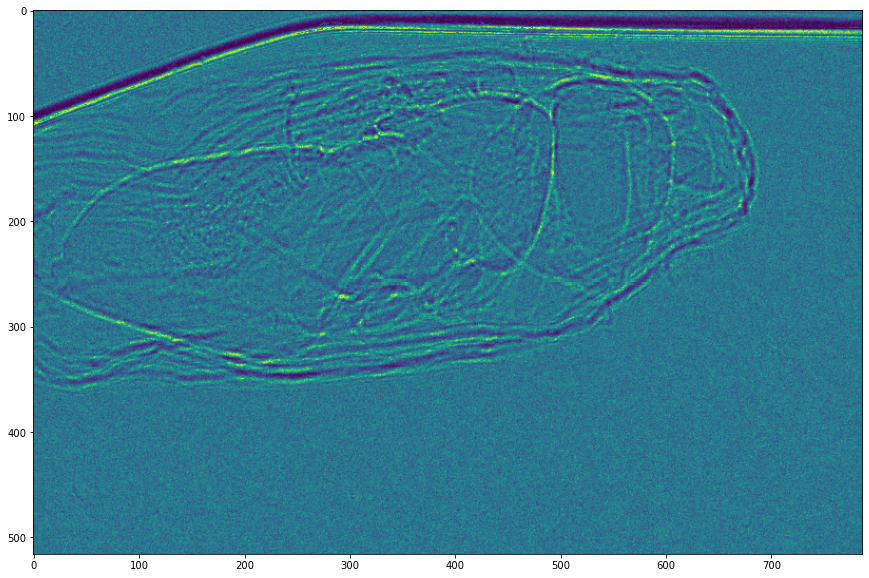

In [24]:
plt.figure(figsize=(16, 10))
plt.imshow(full[0])

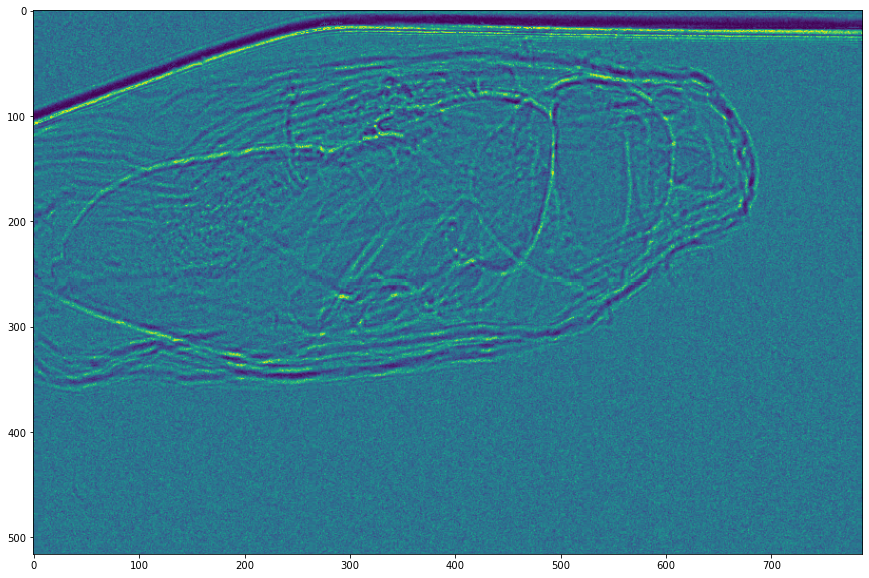

In [25]:
plt.figure(figsize=(16, 10))
plt.imshow(rescale_intensity(full[0], out_range=(0, 255)).astype(np.uint8))

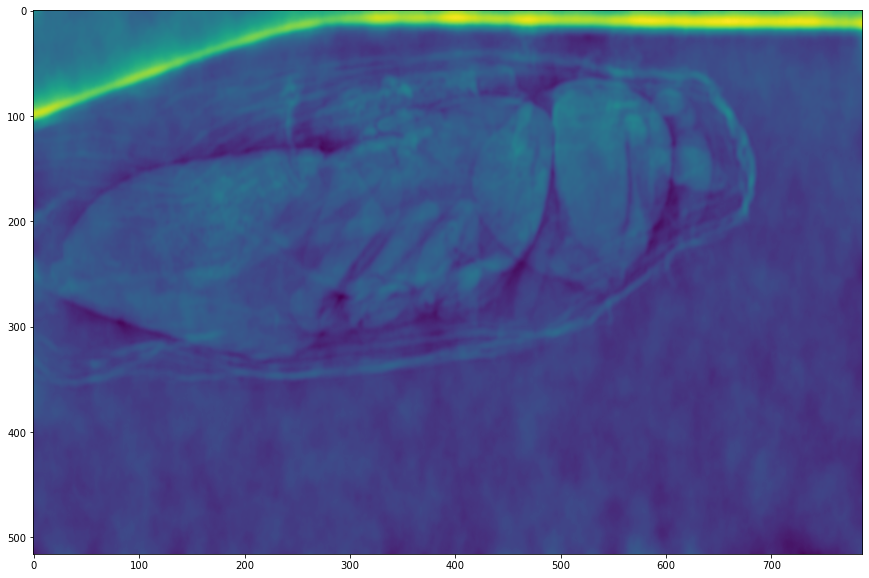

In [26]:
plt.figure(figsize=(16, 10))
plt.imshow(full_pr[0])

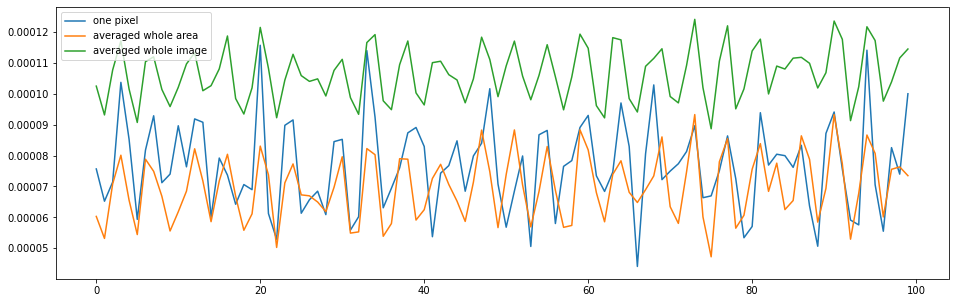

In [27]:
plt.figure(figsize=(16, 5))
plt.plot(full_pr[:, 450, 100], label='one pixel')
plt.plot(full_pr[:, 400:].mean((1, 2)), label='averaged whole area')
plt.plot(full_pr.mean((1, 2)), label='averaged whole image')
plt.legend()
plt.show()

In [28]:
from statsmodels.graphics.tsaplots import plot_acf

/home/ws/tb0536/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/ws/tb0536/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


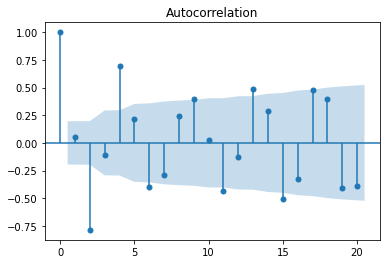

In [29]:
plot_acf(full_pr.mean((1, 2)));

In [87]:
a = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/001/pr-pag-all/scan_0106-pr-pag-2p0.tif')

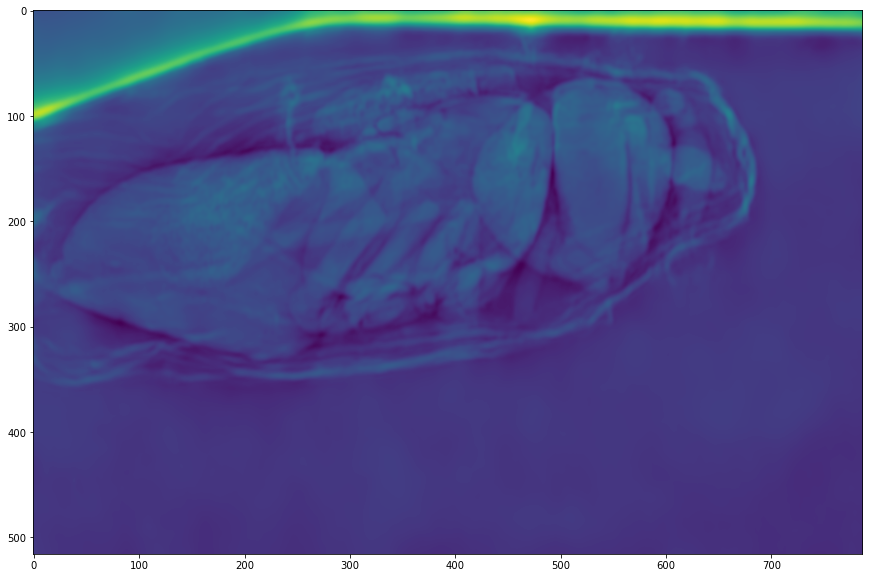

In [30]:
plt.figure(figsize=(16, 10))
plt.imshow(full_after_pr[0])

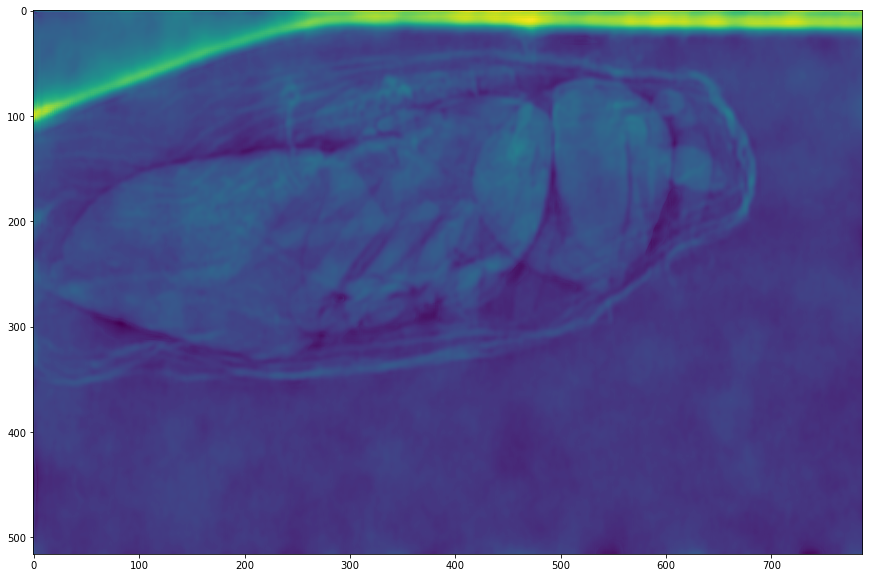

In [31]:
plt.figure(figsize=(16, 10))
plt.imshow(full_new[0])

In [32]:
full_pr_mean = full_pr.mean(0)
full_range = full_pr.max()-full_pr.min()

In [33]:
psnr_pr_before = [peak_signal_noise_ratio(full_pr[i], full_pr_mean, data_range=full_range) for i in range(len(full))]

In [34]:
psnr_pr_after = [peak_signal_noise_ratio(full_after_pr[i], full_pr_mean, data_range=full_range) for i in range(len(full_after))]

In [35]:
psnr_new_after = [peak_signal_noise_ratio(full_new[i], full_pr_mean, data_range=full_range) for i in range(len(full_after))]

In [36]:
psnr_origin = [peak_signal_noise_ratio(full_orig[i], full_pr_mean, data_range=full_range) for i in range(len(full_after))]

(array([ 3.,  4., 10., 10., 13., 13., 13., 15., 13.,  4.]),
 array([33.15115941, 33.6618256 , 34.17249179, 34.68315798, 35.19382417,
        35.70449036, 36.21515655, 36.72582274, 37.23648893, 37.74715513,
        38.25782132]),
 <BarContainer object of 10 artists>)

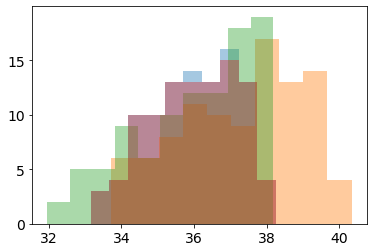

In [103]:
plt.hist(psnr_pr_before, alpha=0.4)
plt.hist(psnr_pr_after, alpha=0.4)
plt.hist(psnr_new_after, alpha=0.4)
plt.hist(psnr_origin, alpha=0.4)

In [38]:
np.mean(psnr_pr_before), np.mean(psnr_pr_after), np.mean(psnr_new_after), np.mean(psnr_origin)

(35.984250901284575, 37.3050456396242, 36.00363441533187, 35.97616786978356)

In [83]:
get_ci_estimation(psnr_pr_before)

$35.984250901284575 \pm 0.2346974133252573$


In [84]:
get_ci_estimation(psnr_pr_after)

$37.3050456396242 \pm 0.3439285290222571$


In [85]:
get_ci_estimation(psnr_new_after)

$36.00363441533187 \pm 0.3278708556126233$


In [40]:
np.std(psnr_pr_before), np.std(psnr_pr_after), np.std(psnr_new_after), np.std(psnr_origin)

(1.1768923635215187,
 1.7066879655247749,
 1.6270044392977965,
 1.1862192306258597)

In [42]:
from skimage.metrics import structural_similarity

In [43]:
ssim_before = [structural_similarity(full[i], full_mean, data_range=full_range) for i in range(len(full))]

In [45]:
ssim_after = [structural_similarity(full_after[i], full_mean, data_range=full_range) for i in range(len(full_after))]

In [86]:
get_ci_estimation(ssim_before)

$0.4067065814505173 \pm 0.00016045622719201846$


In [87]:
get_ci_estimation(ssim_after)

$0.48602094353084513 \pm 0.00031869844642773426$


(array([ 5.,  8.,  9., 13., 23., 15., 11.,  6.,  5.,  3.]),
 array([0.48270474, 0.4834143 , 0.48412385, 0.48483341, 0.48554297,
        0.48625253, 0.48696208, 0.48767164, 0.4883812 , 0.48909076,
        0.48980031]),
 <BarContainer object of 10 artists>)

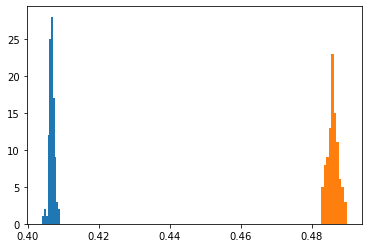

In [47]:
plt.hist(ssim_before)
plt.hist(ssim_after)

In [48]:
ssim_pr_before = [structural_similarity(full_pr[i], full_pr_mean, data_range=full_range) for i in range(len(full))]

In [49]:
ssim_pr_after = [structural_similarity(full_after_pr[i], full_pr_mean, data_range=full_range) for i in range(len(full_after))]

In [50]:
ssim_new_after = [structural_similarity(full_new[i], full_pr_mean, data_range=full_range) for i in range(len(full_after))]

In [51]:
ssim_origin = [structural_similarity(full_orig[i], full_pr_mean, data_range=full_range) for i in range(len(full_after))]

(array([ 1.,  0.,  0.,  3.,  6.,  4., 10., 17., 24., 33.]),
 array([0.92290499, 0.92838375, 0.93386252, 0.93934128, 0.94482005,
        0.95029881, 0.95577758, 0.96125634, 0.96673511, 0.97221387,
        0.97769264]),
 <BarContainer object of 10 artists>)

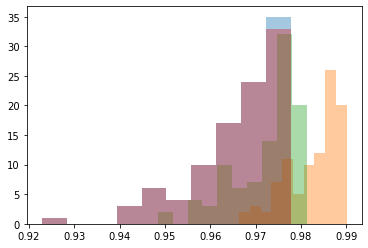

In [52]:
plt.hist(ssim_pr_before, alpha=0.4)
plt.hist(ssim_pr_after, alpha=0.4)
plt.hist(ssim_new_after, alpha=0.4)
plt.hist(ssim_origin, alpha=0.4)

In [53]:
np.mean(ssim_pr_before), np.mean(ssim_pr_after), np.mean(ssim_new_after), np.mean(ssim_origin)

(0.966145523823014, 0.9827054195568852, 0.9723629750231677, 0.9659820586660354)

In [88]:
get_ci_estimation(ssim_pr_before)

$0.966145523823014 \pm 0.0019829795179724385$


In [89]:
get_ci_estimation(ssim_pr_after)

$0.9827054195568852 \pm 0.0011517399216530722$


In [90]:
get_ci_estimation(ssim_new_after)

$0.9723629750231677 \pm 0.0014412133523254989$


In [54]:
np.std(ssim_pr_before), np.std(ssim_pr_after), np.std(ssim_new_after), np.std(ssim_origin)

(0.009943669249081768,
 0.005715317276202267,
 0.007151780898084144,
 0.009977523270571165)

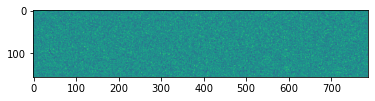

In [57]:
plt.imshow(full[0, 360:])

In [93]:
plt.rcParams.update({'font.size': 14})

([], [])

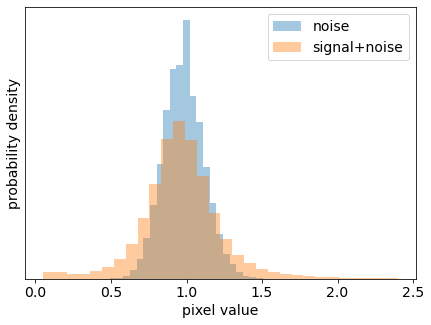

In [99]:
plt.figure(figsize=(7, 5))
plt.hist(full[0, 360:].flatten(), bins=30, density=True, alpha=0.4, label='noise');
plt.hist(full[0, :360].flatten(), bins=30, density=True, alpha=0.4, label='signal+noise');
# plt.hist(full_after[0, :360].flatten(), bins=30, density=True, alpha=0.4, label='signal+noise');
plt.legend()
plt.xlabel('pixel value')
plt.ylabel('probability density')
plt.yticks([])

([], [])

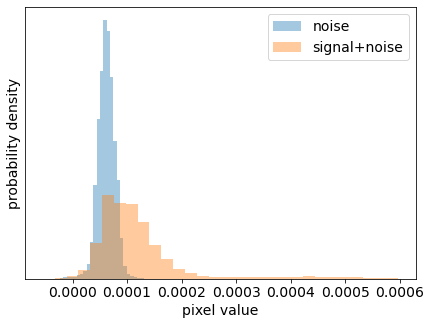

In [100]:
plt.figure(figsize=(7, 5))
plt.hist(full_pr[0, 360:].flatten(), bins=30, density=True, alpha=0.4, label='noise');
plt.hist(full_pr[0, :360].flatten(), bins=30, density=True, alpha=0.4, label='signal+noise');
plt.legend()
plt.xlabel('pixel value')
plt.ylabel('probability density')
plt.yticks([])

Text(0.5, 1.0, 'after exp(-PR)')

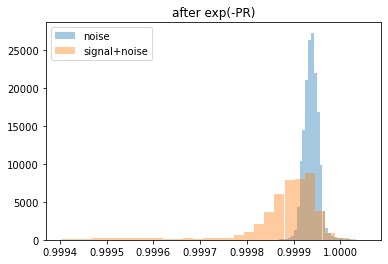

In [97]:
plt.hist(np.exp(-full_pr[0, 360:]).flatten(), bins=30, density=True, alpha=0.4, label='noise');
plt.hist(np.exp(-full_pr[0, :360]).flatten(), bins=30, density=True, alpha=0.4, label='signal+noise');
plt.legend()
plt.title('after exp(-PR)')